In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('data/classify_data_3_emo_cla_prob_extra_topic_extendEmoDict_2_updateSTSC.csv')
data.shape

(30901, 41)

In [9]:
data = data[data['emo_prob_kw']!='-1']
data['anger-joy'] = data['anger_kw'] - data['joy_kw']
T = data[data['label']=='LT'].append(data[data['label']=='HT'])
HT = data[data['label']=='HT']
HF = data[data['label']=='HF']
F = data[data['label']=='LF'].append(data[data['label']=='HF'])
HLT = data[data['label']=='LT'][data['followers_count']>=1000]
LHF = data[data['label']=='HF'][data['followers_count']<1000]
HLF = data[data['label']=='LF'][data['followers_count']>=1000]
L = data[data['label']=='LT'].append(data[data['label']=='LF'])
H = data[data['label']=='HT'].append(data[data['label']=='HF'])

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [28]:
def theta(news1, news2, alpha):
    sub1 = news1[news1['anger_kw']>=alpha]
    sub2 = news2[news2['anger_kw']>=alpha]
    res = (sub1.shape[0]/news1.shape[0])-(sub2.shape[0]/news2.shape[0])
    return (alpha, res)

In [29]:
import matplotlib.pyplot as plt

def plot_theta(diff):
    font1 = {
    'weight' : 'normal',
    'size'   : 18,
    }
    fig, ax = plt.subplots()
    diff = dict(diff)
    ax.plot(list(diff.values()), linewidth=3, label='HF-HT', marker='s', 
            markerfacecolor='#58a6a6', 
            markeredgecolor='white',
            color='#58a6a6',
            markersize=10)
    ax.set_xticks(np.arange(0,24,4))
    ax.set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.tick_params(labelsize=16, colors='black')
    ax.set_xlabel(r'$\theta$', font1, color='black')
    ax.set_ylabel(r'$\beta$', font1, color='black')
    plt.tight_layout()
    plt.show()

In [30]:
diff = []
for x in np.arange(0,1.05,0.05):
    diff.append(theta(HF, HT, x))

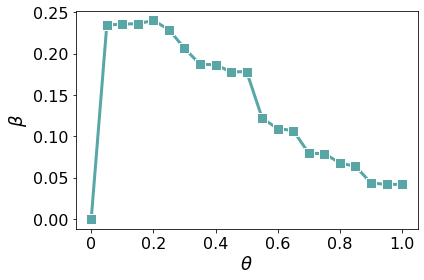

In [31]:
plot_theta(diff)

In [32]:
def ratio(news1, news2, alpha):
    sub1 = news1[news1['anger_kw']>=alpha]
    sub2 = news2[news2['anger_kw']>=alpha]
    res1 = sub1.shape[0]/news1.shape[0]
    res2 = sub2.shape[0]/news2.shape[0]
    res3 = sub1.shape[0]/(sub1.shape[0]+sub2.shape[0])
    res4 = res1/(res1+res2)
    print(res1, res2, res3, res4)

In [34]:
ratio(HF, HT, 0.2)

0.46069909376733864 0.22043386983904828 0.8877405559515325 0.6763717488110991
